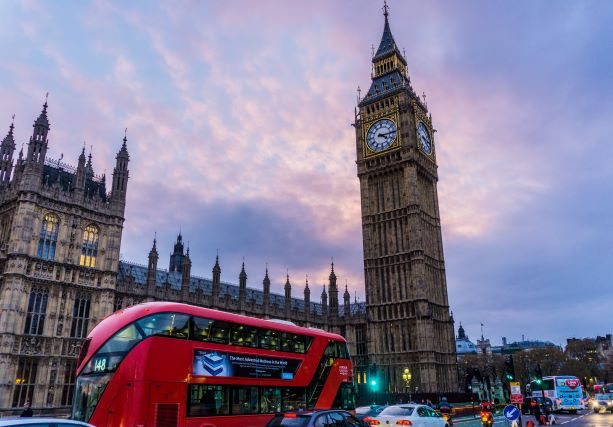

### Life expectancy in the West has increased rapidly in previous decades. This notebook explores mortality statistics in Britain to better understand these trends.

#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

#### Here we create three data frames - males, females and combined

In [2]:
df_female = pd.read_csv('/kaggle/input/uk-deaths-by-year-of-age/Female.csv', index_col = 'Age')
df_male = pd.read_csv('/kaggle/input/uk-deaths-by-year-of-age/Male.csv', index_col = 'Age')
df_combined = df_male + df_female

#### Each dataframe has 47 columns (years 1974-2020) and 101 rows (ages 0-100) 

In [3]:
print('Male',df_male.shape)
print('Female',df_male.shape)
print('Combined',df_combined.shape)

Male (101, 47)
Female (101, 47)
Combined (101, 47)


#### Let's examine the first few rows. The combined dataframe simply adds males and females together.

In [4]:
display(df_male.head())
display(df_female.head())
display(df_combined.head())

,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Age,,,,,,,,,,,,,,,,,,,,,
0,7180,6392,5706,5350,5220,5447,5174,4759,4555,4230,...,2049,1912,1741,1646,1752,1654,1664,1570,1601,1463
1,495,402,388,314,338,265,319,310,335,268,...,143,134,135,142,119,111,98,100,90,75
2,311,273,243,235,194,188,194,194,177,171,...,81,74,74,72,67,64,58,48,54,50
3,299,255,217,181,182,149,131,137,143,137,...,46,42,45,56,53,51,47,43,34,48
4,202,209,188,188,152,146,148,130,105,119,...,40,46,44,30,49,34,47,44,30,32


,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Age,,,,,,,,,,,,,,,,,,,,,
0,5172,4798,4070,3933,3908,4026,3938,3402,3342,3126,...,1453,1435,1324,1368,1268,1350,1307,1261,1230,1157
1,383,346,298,263,287,261,267,258,238,228,...,118,104,118,82,100,102,64,90,86,59
2,241,182,175,178,166,134,140,152,163,145,...,59,43,57,55,48,59,56,32,58,40
3,202,176,131,159,143,116,104,105,87,98,...,42,45,44,45,42,39,35,41,39,30
4,155,156,131,120,119,106,85,84,73,96,...,38,35,37,29,32,37,32,19,29,27


,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Age,,,,,,,,,,,,,,,,,,,,,
0,12352,11190,9776,9283,9128,9473,9112,8161,7897,7356,...,3502,3347,3065,3014,3020,3004,2971,2831,2831,2620
1,878,748,686,577,625,526,586,568,573,496,...,261,238,253,224,219,213,162,190,176,134
2,552,455,418,413,360,322,334,346,340,316,...,140,117,131,127,115,123,114,80,112,90
3,501,431,348,340,325,265,235,242,230,235,...,88,87,89,101,95,90,82,84,73,78
4,357,365,319,308,271,252,233,214,178,215,...,78,81,81,59,81,71,79,63,59,59


#### Let's start by taking an overview of total male and female deaths over the entire period

In [5]:
# sum male and female deaths per year
male_sum =[df_male.iloc[n].sum() for n in range(0,101)]
female_sum =[df_female.iloc[n].sum() for n in range(0,101)]

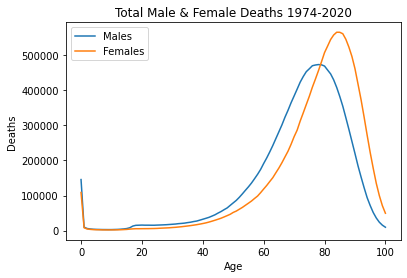

In [6]:
plt.xlabel('Age')
plt.ylabel('Deaths')
plt.title('Total Male & Female Deaths 1974-2020')
x = range(0,101)
sns.lineplot(data = male_sum, label = 'Males')
sns.lineplot(data = female_sum, label = 'Females')
plt.legend()

#### Notice the difference between male and female deaths. Both look like normal distributions within a certain age range. Let's look at deaths at the start and end of the period

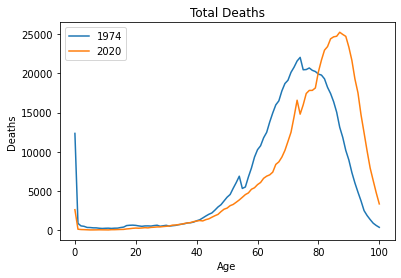

In [7]:
plt.xlabel('Age')
plt.ylabel('Deaths')
plt.title('Total Deaths')
plt.plot(df_combined['1974'], label = '1974')
plt.plot(df_combined['2020'], label = '2020')
plt.legend()

#### The peak has moved to the right as people live longer. There are increasing numbers of centenarians

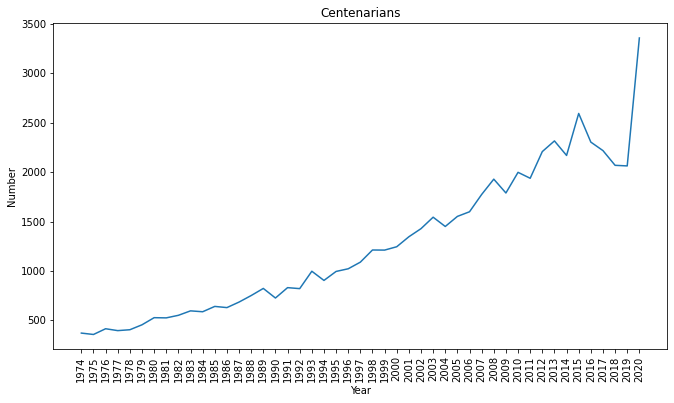

In [8]:
plt.figure(figsize=(11,6))
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Centenarians')
plt.plot(df_combined.iloc[100])

In [9]:
print('Centenarians in 1974:',df_combined['1974'].iloc[100])
print('Centenarians in 2020:',df_combined['2020'].iloc[100])

Centenarians in 1974: 371
Centenarians in 2020: 3358


### There are many more female than male centenarians

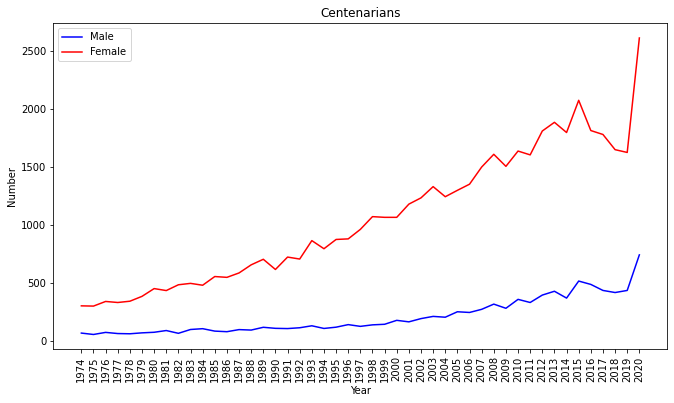

In [10]:
plt.figure(figsize=(11,6))
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Centenarians')
plt.plot(df_male.iloc[100], color='blue', label = 'Male')
plt.plot(df_female.iloc[100], color = 'red', label = 'Female')
plt.legend()

In [11]:
print('Male Centenarians in 1974:',df_male['1974'].iloc[100])
print('Male Centenarians in 2020:',df_male['2020'].iloc[100])
print('Female Centenarians in 1974:',df_female['1974'].iloc[100])
print('Female Centenarians in 2020:',df_female['2020'].iloc[100])

Male Centenarians in 1974: 68
Male Centenarians in 2020: 743
Female Centenarians in 1974: 303
Female Centenarians in 2020: 2615


#### Newborn deaths have declined dramatically

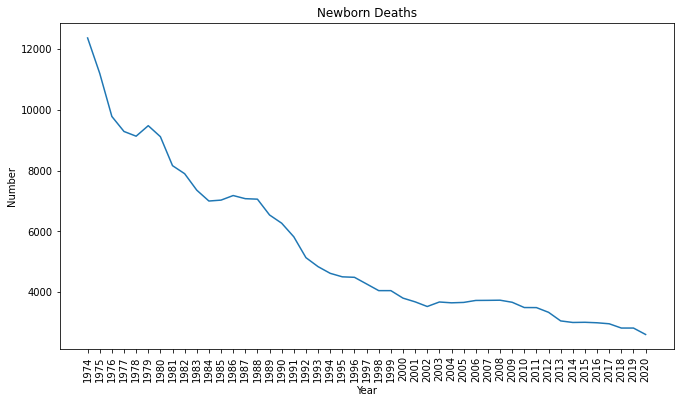

In [12]:
plt.figure(figsize=(11,6))
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Newborn Deaths')
plt.plot(df_combined.iloc[0])

In [13]:
print('Newborn deaths in 1974:',df_combined['1974'].iloc[0])
print('Newborn deaths in 2020:',df_combined['2020'].iloc[0])

Newborn deaths in 1974: 12352
Newborn deaths in 2020: 2620


#### Male and female newborn deaths have both steeply declined, with a consistent gender gap

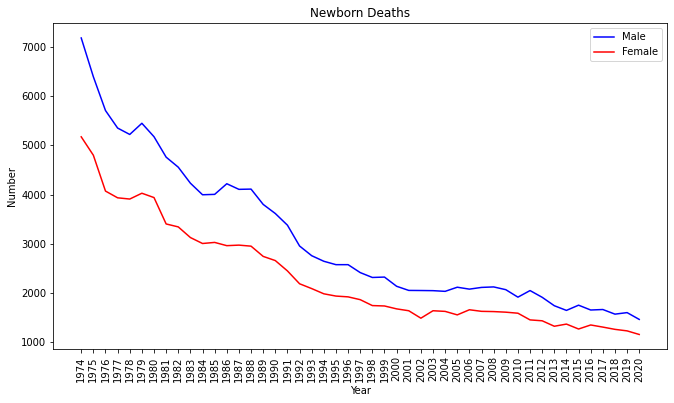

In [14]:
plt.figure(figsize=(11,6))
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Newborn Deaths')
plt.plot(df_male.iloc[0], color='blue', label = 'Male')
plt.plot(df_female.iloc[0], color='red', label = 'Female')
plt.legend()

#### Deaths in any one year are closely correlated with earlier deaths - autocorrelation.

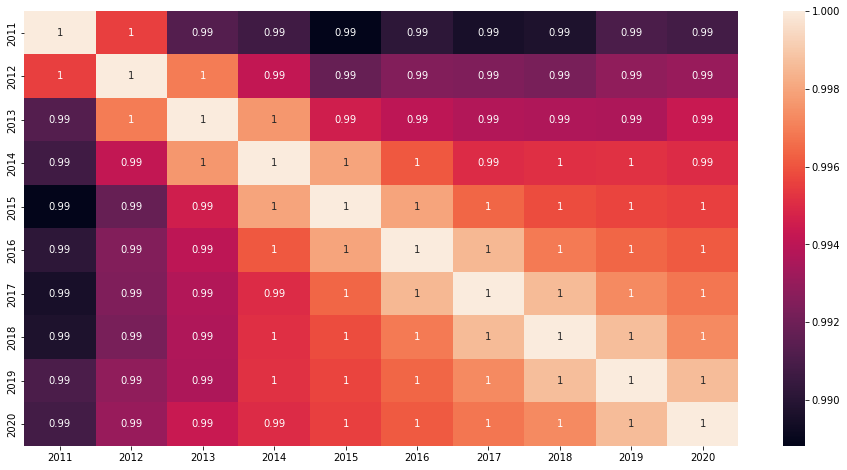

In [15]:
plt.figure(1 , figsize = (16 , 8))
ten_years = df_combined.T.tail(10).T
plt.figure(1 , figsize = (16 , 8))
cor = sns.heatmap(ten_years.corr(), annot = True)

#### 84,000 more deaths occurred in 2020 than 2019 - presumbly due to Covid

In [16]:
print('Total Deaths in 2019:',sum(df_combined['2019']))
print('Total Deaths in 2020:',sum(df_combined['2020']))

Total Deaths in 2019: 600953
Total Deaths in 2020: 685534


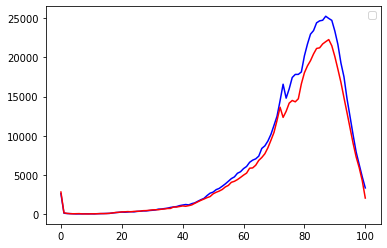

In [17]:
plt.plot(df_combined['2020'], color = 'blue')
plt.plot(df_combined['2019'], color = 'red')
plt.legend()

#### Let's use random forest to try to predict deaths in 2019 based on the previous year

In [18]:
model = RandomForestRegressor()

In [19]:
columns = ['2018']
X= df_combined[columns]
y = df_combined['2019']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
predictions = model.predict(X_test)

In [23]:
mean_absolute_error(y_test, predictions)

186.40999999999997

In [24]:
mape = np.mean(np.abs((y_test - predictions)/y))*100
print('Mean Average Percentage Error =',mape)


Mean Average Percentage Error = 7.326182858913886


#### Room for improvement?